## Breast Cancer Detection and Classification<hr>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Breast Cancer Wisconsin (Diagnostic)
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  
They describe characteristics of the cell nuclei present in the image.

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

### Data Preprocessing

In [2]:
data = pd.read_csv("C:\\Users\\supri\\OneDrive\\Desktop\\DAEN 3rd SEM\\AIT 736\\wdbc.csv", header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data = data.drop(0, axis = 1)

In [5]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data[1].unique()

array(['M', 'B'], dtype=object)

In [7]:
data[1] = data[1].replace({'M':1,'B':0})

In [8]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
data.rename(columns={1: 'Class'}, inplace=True)

In [10]:
np.array(data['Class'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

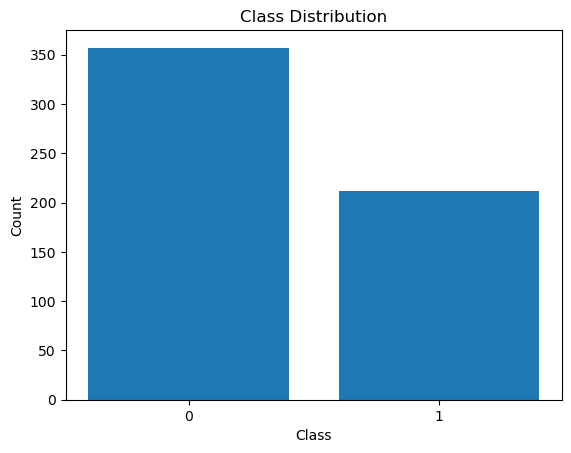

In [11]:
# Class Distribution
class_counts = data['Class'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(class_counts.index)
plt.title('Class Distribution')
plt.show()

In [12]:
data.head()

,Class,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
X = data.drop("Class", axis = 1)
y = data["Class"]

In [14]:
X = np.array(X)
y = np.array(y)

split_ratio = 0.8

split_index = int(len(data) * split_ratio)

# Spliting the dataset into training and test sets
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

### Pocket Perceptron Implementation

In [15]:
import numpy as np

class PocketPerceptron:
    def __init__(self, learning_rate, n_iterations):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.accuracy_history = []
        self.iterations_history = []
        
    
    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.best_weights = self.weights.copy()
        self.best_accuracy = 0
        
        for iteration in range(self.n_iterations):
            accuracy = self.calculate_accuracy(X, y)
            self.accuracy_history.append(accuracy)
            self.iterations_history.append(iteration)
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                new_accuracy = self.calculate_accuracy(X, y)
                
            if accuracy > self.best_accuracy:
                self.best_accuracy = accuracy
                self.best_weights = self.weights.copy()
        
        self.weights = self.best_weights
    
    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, 0)
    
    def calculate_accuracy(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)

### Evaluation

In [16]:
pocket_perceptron = PocketPerceptron(learning_rate=0.1, n_iterations=3000)
pocket_perceptron.fit(X_train, y_train)

In [17]:
y_train_pred = pocket_perceptron.predict(X_train)

In [18]:
print(y_train_pred)

[1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0]


In [19]:
# Calculating train accuracy
accuracy_train = pocket_perceptron.calculate_accuracy(X_train, y_train)
print(accuracy_train)

0.9208791208791208


In [20]:
# Calculating test accuracy
test_accuracy = pocket_perceptron.calculate_accuracy(X_test, y_test)
print(test_accuracy)

0.9385964912280702


In [21]:
# The best train accuracy and corresponding iteration number
print(f"Best train accuracy: {pocket_perceptron.best_accuracy}")
print(f"Corresponding iteration number: {pocket_perceptron.accuracy_history.index(pocket_perceptron.best_accuracy) + 1}")

Best train accuracy: 0.9362637362637363
Corresponding iteration number: 900


In [22]:
# Weights achieving the best train accuracy
print("Weights achieving best train accuracy:")
print(pocket_perceptron.best_weights)

Weights achieving best train accuracy:
[-2.07700000e+02 -1.58661310e+03  1.88549700e+03 -5.32711300e+03
 -3.01730000e+02  1.46756350e+01  1.25910834e+02  1.87380049e+02
  7.10152603e+01  1.37903500e+01  3.73373400e+00 -3.18671100e+01
  6.03576000e+00  2.64445600e+02  1.20514490e+03  3.76068500e+00
  3.20915699e+01  4.59345167e+01  9.62457320e+00  9.52359830e+00
  2.15989720e+00 -1.66864460e+03  2.65215400e+03 -1.90857300e+03
  9.40620000e+02  3.16804000e+01  4.09029793e+02  5.17143201e+02
  1.36791587e+02  8.39496800e+01  3.02277480e+01]


In [23]:
y_test_pred = pocket_perceptron.predict(X_test)

In [24]:
print(y_test_pred)

[1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1
 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 0]


In [25]:
# Creating a confusion matrix for the test set
confusion_matrix = np.zeros((2, 2))
for true_label, predicted_label in zip(y_test, y_test_pred):
    confusion_matrix[true_label][predicted_label] += 1

In [26]:
# confusion matrix
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
[[85.  3.]
 [ 4. 22.]]


### Visualization

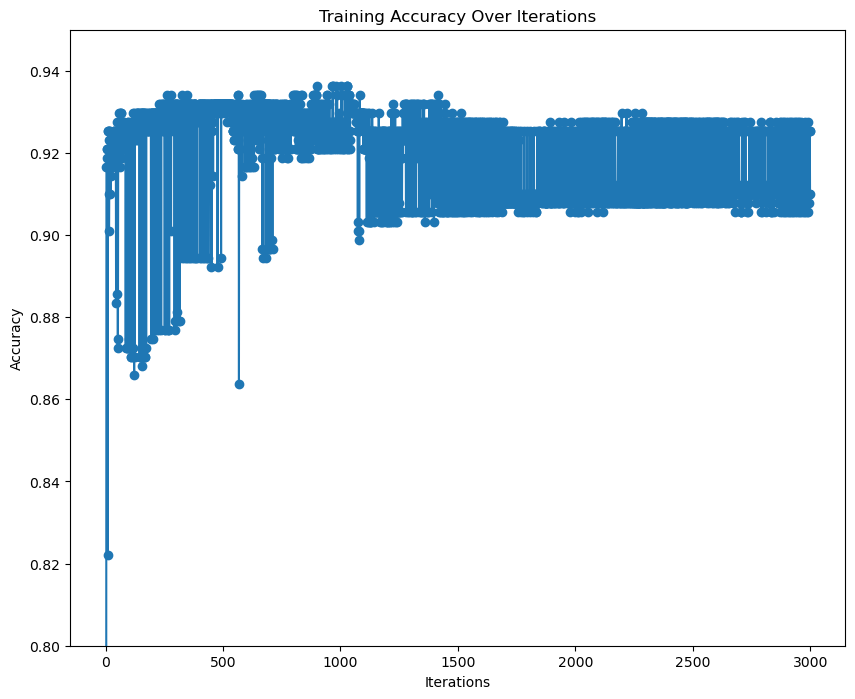

In [27]:
accuracy_history = pocket_perceptron.accuracy_history
iterations_history = pocket_perceptron.iterations_history

fig = plt.figure(figsize=(10, 8))
plt.plot(iterations_history, accuracy_history, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Iterations')
plt.ylim(0.8, 0.95)

plt.show()

### Pseudo_Inverse Interpretation

In [28]:
import numpy as np

# Initializing weights to zeros
weights = np.zeros(X_train.shape[1])

# Calculating the pseudo-inverse of the training data
pseudo_inverse = np.linalg.pinv(X_train)

# Calculating the weights using the pseudo-inverse
weights = np.dot(pseudo_inverse, y_train)

# Make predictions on the training set
y_train_pred = np.dot(X_train, weights)

# Make predictions on the test set
y_test_pred = np.dot(X_test, weights)

# Threshold for classification
threshold = 0.5

# Applying the threshold to classify predictions
y_train_pred_class = np.where(y_train_pred <= threshold, 0, 1)
y_test_pred_class = np.where(y_test_pred <= threshold, 0, 1)

# Calculating the accuracy for training set
accuracy_train = np.mean(y_train_pred_class == y_train)

# Calculating the accuracy for test set
accuracy_test = np.mean(y_test_pred_class == y_test)

# Creating a confusion matrix for the test set
confusion_matrix = np.zeros((2, 2))
for true_label, predicted_label in zip(y_test, y_test_pred_class):
    confusion_matrix[true_label][predicted_label] += 1

# Weights
print("Weights:", weights)

# Accuracy for training and test sets
print("Accuracy on Training Set:", accuracy_train)
print("Accuracy on Test Set:", accuracy_test)

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix)


Weights: [-2.90437719e-01  1.77375764e-02  1.30774970e-02  1.40041425e-03
  6.94423563e-01 -9.92782320e-01  9.09716876e-01  2.40710217e+00
 -9.62301464e-01 -1.89862383e+01  3.21852704e-01  3.60295119e-02
 -1.13368790e-02 -1.03705753e-03  1.34921060e+01 -2.97837841e+00
 -3.48133175e+00  1.08186882e+01 -1.76147931e-01  1.20358019e+01
  2.23316251e-01 -2.84605781e-03 -2.35232697e-03 -1.22287883e-03
  9.36940025e-02  4.21643177e-02  4.69650171e-01  7.76555549e-01
  7.57804897e-01  4.42959834e+00]
Accuracy on Training Set: 0.9626373626373627
Accuracy on Test Set: 0.9736842105263158
Confusion Matrix:
[[87.  1.]
 [ 2. 24.]]
